In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [13]:
from tensorflow import keras
from keras.datasets import boston_housing
(xTrainSet, yTrainSet), (xTest, yTest) = boston_housing.load_data()

Check Data

In [14]:
xTrainSet.shape, yTrainSet.shape, xTest.shape, yTest.shape

((404, 13), (404,), (102, 13), (102,))

In [16]:
from sklearn.model_selection import train_test_split

xTrain, xValid, yTrain, yValid = train_test_split(xTrainSet, yTrainSet, random_state=1)

In [18]:
from sklearn.preprocessing import StandardScaler

scal = StandardScaler()

xTrain = scal.fit_transform(xTrain)

xValid = scal.transform(xValid)
xTest = scal.transform(xTest)

Build Model

In [20]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

keras.backend.clear_session()
np.random.seed(1)
tf.random.set_seed(1)

In [24]:
model = Sequential()
model.add(Dense(units=100, activation='relu', input_shape=xTrain.shape[1:]))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=1))

Check Model

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               1400      
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 6501 (25.39 KB)
Trainable params: 6501 (25.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Get weights and bias

In [26]:
weights, biases = model.layers[1]. get_weights()

In [27]:
biases.shape, biases

((50,),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32))

In [28]:
weights.shape, weights

((100, 50),
 array([[-0.03756662,  0.03855625,  0.17310132, ...,  0.00995211,
         -0.03724761,  0.06403627],
        [-0.19963585,  0.09238248,  0.13323231, ...,  0.04460445,
         -0.06667599, -0.10682449],
        [-0.02479196, -0.07966628,  0.16019936, ..., -0.19557853,
         -0.05748077,  0.0286034 ],
        ...,
        [ 0.101189  , -0.03993373, -0.19848037, ..., -0.08514853,
         -0.10566545, -0.14789534],
        [ 0.00579476, -0.07346773, -0.15504245, ...,  0.1417038 ,
          0.1824625 , -0.00440755],
        [ 0.00457206,  0.03229813,  0.10519563, ..., -0.06673694,
         -0.03852168,  0.06125988]], dtype=float32))

compile

In [29]:
model.compile(loss='mse', optimizer=SGD(learning_rate=1e-3))

Train

In [30]:
train = model.fit(xTrain, yTrain, epochs=20, validation_data=(xValid, yValid))

Epoch 1/20
10/10 [==============================] - 0s 7ms/step - loss: 538.7944 - val_loss: 421.7339
Epoch 2/20
10/10 [==============================] - 0s 2ms/step - loss: 248.6994 - val_loss: 98.2774
Epoch 3/20
10/10 [==============================] - 0s 2ms/step - loss: 58.6807 - val_loss: 50.3724
Epoch 4/20
10/10 [==============================] - 0s 2ms/step - loss: 32.2260 - val_loss: 34.8529
Epoch 5/20
10/10 [==============================] - 0s 2ms/step - loss: 24.3127 - val_loss: 28.1113
Epoch 6/20
10/10 [==============================] - 0s 2ms/step - loss: 20.9688 - val_loss: 24.6916
Epoch 7/20
10/10 [==============================] - 0s 2ms/step - loss: 18.9390 - val_loss: 21.8786
Epoch 8/20
10/10 [==============================] - 0s 2ms/step - loss: 17.4471 - val_loss: 20.1630
Epoch 9/20
10/10 [==============================] - 0s 2ms/step - loss: 16.1077 - val_loss: 18.1742
Epoch 10/20
10/10 [==============================] - 0s 2ms/step - loss: 14.7640 - val_loss: 16.3

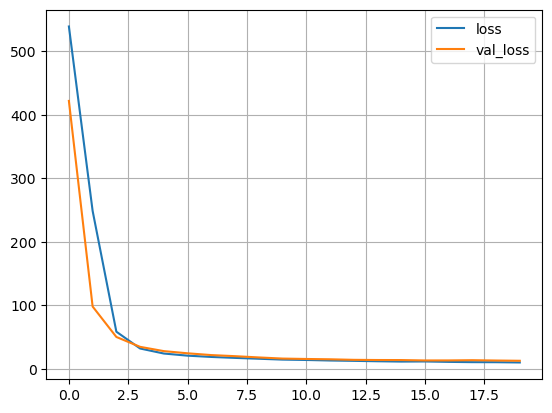

In [32]:
pd.DataFrame(train.history).plot()
plt.grid(True)
plt.show()

Evaluate

In [33]:
model.evaluate(xTest, yTest)

4/4 [==============================] - 0s 2ms/step - loss: 24.5796


24.579633712768555

Predict

In [34]:
model.predict(xTest[:3])

1/1 [==============================] - 0s 33ms/step


array([[ 7.6413565],
       [16.503714 ],
       [21.387808 ]], dtype=float32)

In [35]:
yTest[:3]

array([ 7.2, 18.8, 19. ])